In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
sns.set()

Importing dataset
1)dataset is about Flight Price Prediction
2)data is in form of excel file

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Check whether any null values are there or not

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#There are only 2 NA'S better to drop

In [7]:
train_data.dropna(axis=0,inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.shape

(10682, 11)

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
#EDA

In [12]:
#From description we can see that Date_of_Journey is a object data type,
#Therefore, we have to convert this datatype into timestamp 

In [13]:
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [14]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
# Similar to Date_of_Journey we can extract values from Arrival_Time
# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
#extracting hours and minute from duration
duration = list(train_data["Duration"])

In [23]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [24]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [25]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [26]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [27]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [28]:
train_data.drop(["Duration"],axis=1,inplace=True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
#Tital_stops feature Ordinal Categorical type we perform LabelEncoder
train_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4},inplace=True)

In [32]:
train_data["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [33]:
train_data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [34]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
#label encoding done for Route feature
#drop  Route,Total_Stops and Additional_Info
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [36]:
#user defined function
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)}))

In [37]:
understand_data(train_data)

,Datatype,No of NAs,No of Levels,Levels
Airline,object,0,12,['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet'...
Source,object,0,5,['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination,object,0,6,['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'De...
Total_Stops,int64,0,5,[0 2 1 3 4]
Price,int64,0,1870,[ 3897 7662 13882 ... 9790 12352 12648]
Journey_day,int64,0,10,[24 1 9 12 27 18 3 15 6 21]
Journey_month,int64,0,4,[3 5 6 4]
Dep_hour,int64,0,24,[22 5 9 18 16 8 11 20 21 17 14 4 7 10 15 ...
Dep_min,int64,0,12,[20 50 25 5 0 55 45 40 10 15 35 30]
Arrival_hour,int64,0,24,[ 1 13 4 23 21 11 10 5 19 22 9 12 6 8 3 ...


In [38]:
#Airline,Source,Destination convert to category, does not have any order
cat_col = ["Airline","Source","Destination"]

In [39]:
train_data[cat_col] = train_data[cat_col].astype("category")

In [40]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

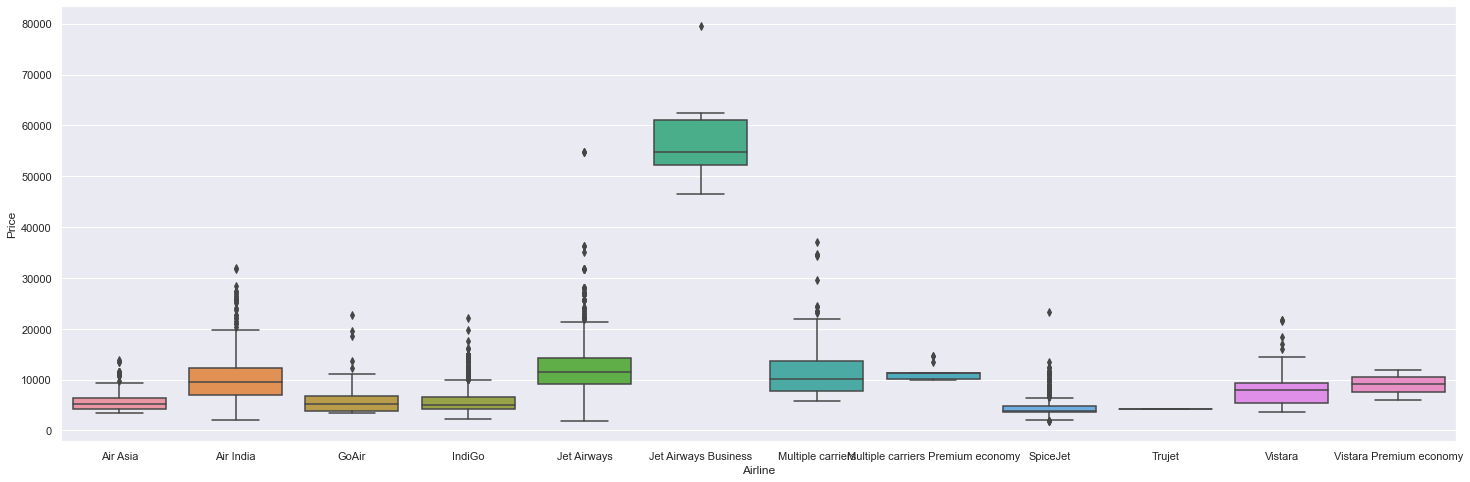

In [41]:
#Airline vs Price Analysis
plt.figure(figsize=(25,8))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [42]:
#From graph we can see that Jet Airways Business have the highest Price., 
#Apart from the first Airline almost all are having similar median

<AxesSubplot:xlabel='Source', ylabel='Price'>

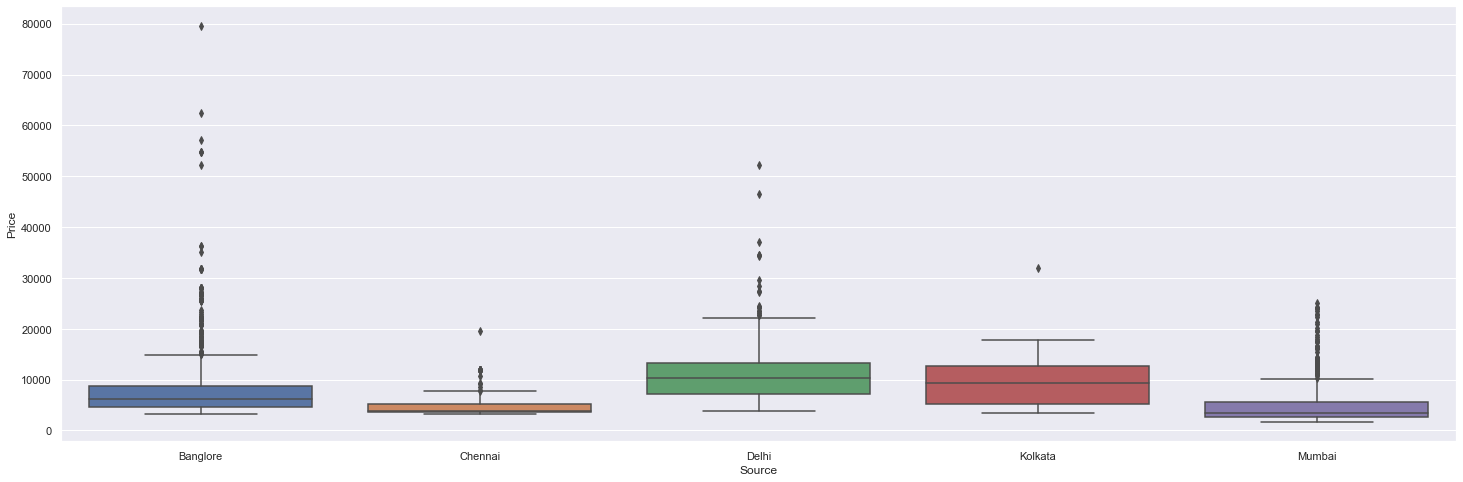

In [43]:
#Source vs Price Analysis
plt.figure(figsize=(25,8))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Destination', ylabel='Price'>

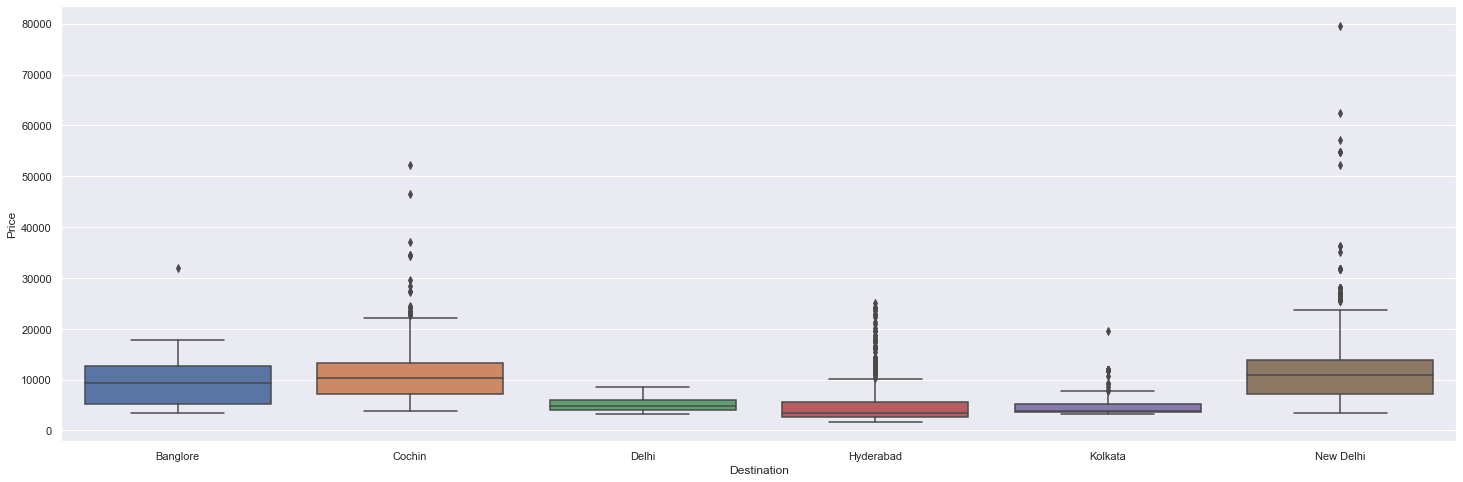

In [44]:
#Destination vs Price Analysis
plt.figure(figsize=(25,8))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [45]:
#Airline,Source,Destination data are not in any order use OneHotEncoder 
ohe = OneHotEncoder(handle_unknown="ignore")

In [46]:
cat_col = ["Airline","Source","Destination"]
ohe.fit(train_data[cat_col])
train_data_cat = ohe.transform(train_data[cat_col])

In [47]:
columns_ohe = list(ohe.get_feature_names())
columns_ohe

['x0_Air Asia',
 'x0_Air India',
 'x0_GoAir',
 'x0_IndiGo',
 'x0_Jet Airways',
 'x0_Jet Airways Business',
 'x0_Multiple carriers',
 'x0_Multiple carriers Premium economy',
 'x0_SpiceJet',
 'x0_Trujet',
 'x0_Vistara',
 'x0_Vistara Premium economy',
 'x1_Banglore',
 'x1_Chennai',
 'x1_Delhi',
 'x1_Kolkata',
 'x1_Mumbai',
 'x2_Banglore',
 'x2_Cochin',
 'x2_Delhi',
 'x2_Hyderabad',
 'x2_Kolkata',
 'x2_New Delhi']

In [48]:
train_data_cat = pd.DataFrame(data=train_data_cat.todense(),columns=columns_ohe)

In [49]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [50]:
data_final = pd.concat([train_data,train_data_cat],axis=1)

In [51]:
pd.set_option("display.max_columns",None)
data_final.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,x0_Air Asia,x0_Air India,x0_GoAir,x0_IndiGo,x0_Jet Airways,x0_Jet Airways Business,x0_Multiple carriers,x0_Multiple carriers Premium economy,x0_SpiceJet,x0_Trujet,x0_Vistara,x0_Vistara Premium economy,x1_Banglore,x1_Chennai,x1_Delhi,x1_Kolkata,x1_Mumbai,x2_Banglore,x2_Cochin,x2_Delhi,x2_Hyderabad,x2_Kolkata,x2_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
data_final = data_final.drop(["Airline","Source","Destination"],axis=1)

In [53]:
data_final.shape

(10683, 33)

In [54]:
data_final.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,x0_Air Asia,x0_Air India,x0_GoAir,x0_IndiGo,x0_Jet Airways,x0_Jet Airways Business,x0_Multiple carriers,x0_Multiple carriers Premium economy,x0_SpiceJet,x0_Trujet,x0_Vistara,x0_Vistara Premium economy,x1_Banglore,x1_Chennai,x1_Delhi,x1_Kolkata,x1_Mumbai,x2_Banglore,x2_Cochin,x2_Delhi,x2_Hyderabad,x2_Kolkata,x2_New Delhi
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
data_final.isnull().sum()

Total_Stops                             1
Price                                   1
Journey_day                             1
Journey_month                           1
Dep_hour                                1
Dep_min                                 1
Arrival_hour                            1
Arrival_min                             1
Duration_hours                          1
Duration_mins                           1
x0_Air Asia                             1
x0_Air India                            1
x0_GoAir                                1
x0_IndiGo                               1
x0_Jet Airways                          1
x0_Jet Airways Business                 1
x0_Multiple carriers                    1
x0_Multiple carriers Premium economy    1
x0_SpiceJet                             1
x0_Trujet                               1
x0_Vistara                              1
x0_Vistara Premium economy              1
x1_Banglore                             1
x1_Chennai                        

In [56]:
data_final.dropna(axis=0,inplace=True)

In [57]:
data_final.shape

(10681, 33)

In [58]:
#Feature Selection

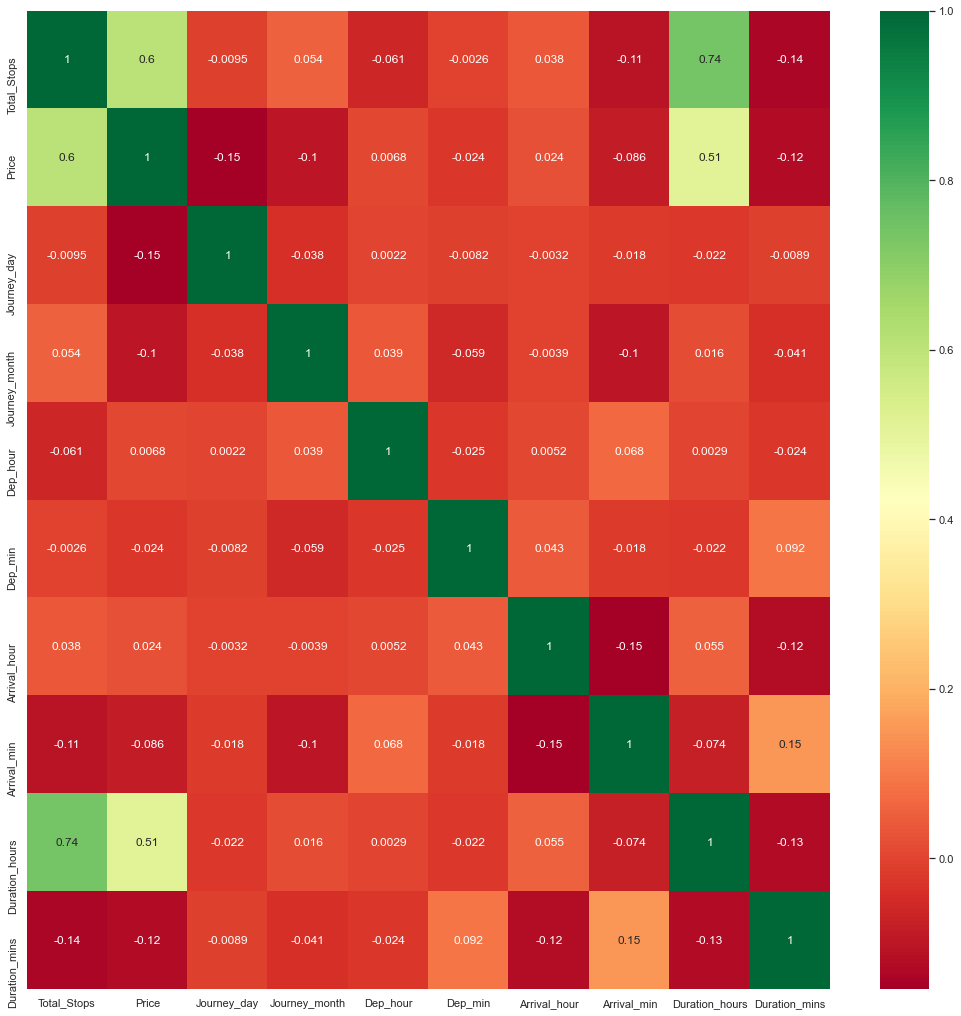

In [59]:
#1)heatmap
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()


In [60]:
X = data_final.drop(["Price"],axis=1)
y = data_final["Price"]

In [61]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [62]:
print(selection.feature_importances_)

[2.03962633e-01 1.42870289e-01 6.62867257e-02 2.89664795e-02
 2.58405546e-02 3.75711250e-02 2.67017296e-02 1.91405741e-01
 2.30029278e-02 1.62655695e-03 7.43215984e-03 2.22525461e-03
 1.08990856e-02 9.83067472e-02 3.81778712e-02 1.43302122e-02
 6.36365216e-04 2.54545910e-03 1.07933365e-04 4.81119239e-03
 8.80416077e-05 4.44156276e-03 1.10375519e-03 7.07469109e-03
 3.12984235e-03 3.59737610e-03 3.13055181e-03 8.95432373e-03
 1.60305376e-02 4.66434843e-03 1.16743865e-03 1.89104879e-02]


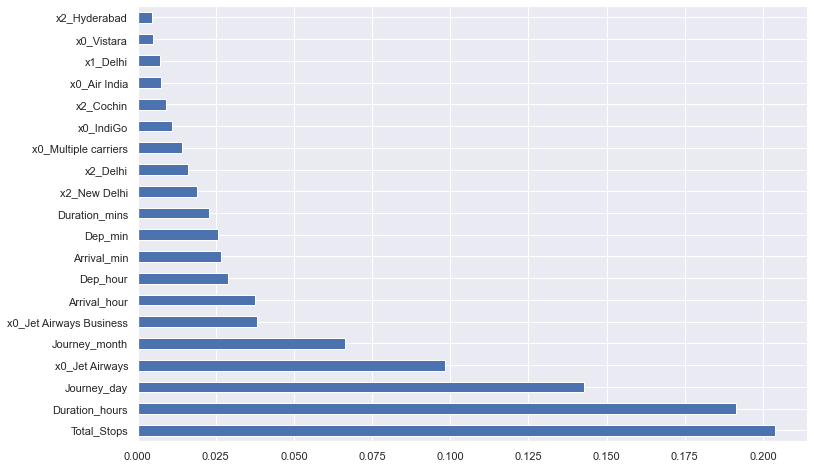

In [63]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [64]:
#Check For Outliers
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


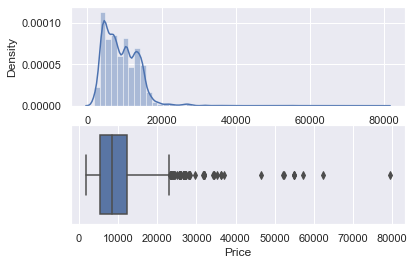

In [65]:
plot(data_final,"Price")

In [66]:
#As there is some outliers in price feature,so we replace it with median
data_final['Price']=np.where(data_final['Price']>=40000,data_final['Price'].median(),data_final['Price'])

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


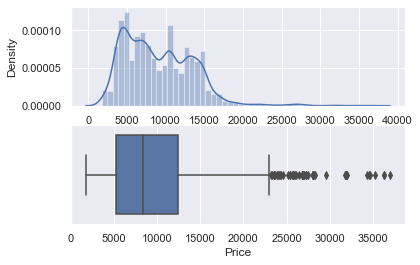

In [67]:
plot(data_final,"Price")

In [68]:
# spiliting the dataset
train_x,val_x,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=123)

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def model_building(model):
    m=model
    m.fit(train_x,train_y)
    train_pred = m.predict(train_x)
    val_pred = m.predict(val_x)
    r2score=r2_score(val_y, val_pred) 
    #residuals=val_pred-val_y
    #sns.residplot(val_pred,residuals,lowess=True, color="g")
    print('=======Train======')
    print('MSE: ', mean_squared_error(train_y, train_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(train_y, train_pred)))
    print('MAE: ', mean_absolute_error(train_y,train_pred))
    print('MAPE: ', np.mean(np.abs((train_y - train_pred)/train_y))*100)
    print('======Test======')
    print('MSE: ', mean_squared_error(val_y, val_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(val_y, val_pred)))
    print('MAE: ', mean_absolute_error(val_y,val_pred))
    print ('MAPE: ',np.mean(np.abs((val_y - val_pred)/val_y))*100)
    print("r2score is:",r2score)
    return m

In [70]:
#Model-1
from sklearn.linear_model import LinearRegression
reg = model_building(LinearRegression())

=======Train======
MSE:  8431445.75106178
RMSE:  2903.6951890757714
MAE:  2078.9933296709455
MAPE:  25.96559587950323
======Test======
MSE:  8680757.45617146
RMSE:  2946.312518415428
MAE:  2109.9023684459876
MAPE:  25.374957290053064
r2score is: 0.5442075369362949


In [71]:
#Model-2(Decission Tree)
from sklearn.tree import DecisionTreeRegressor
dt_reg1 = model_building(DecisionTreeRegressor(max_depth=7))

=======Train======
MSE:  4799911.06819866
RMSE:  2190.8699341126257
MAE:  1571.5973134673488
MAPE:  19.011508975866633
======Test======
MSE:  5859434.587359
RMSE:  2420.6268996602926
MAE:  1648.9301212354264
MAPE:  19.431193952842673
r2score is: 0.6923441144143088


In [72]:
#Model-3(Decission Tree with Grid)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dt_grid=DecisionTreeRegressor(random_state=2)
dt_param_grid = {"min_samples_leaf": [2,3,4,5,6,7],
                  "max_depth": [3,4,5,6,7,8]}
dt_reg2 = model_building(RandomizedSearchCV(dt_grid,dt_param_grid,cv=5,n_jobs=-1,n_iter=100))


C:\Users\Raj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


=======Train======
MSE:  4320599.152545411
RMSE:  2078.6050977868335
MAE:  1479.0455987414969
MAPE:  17.68570670665293
======Test======
MSE:  5873582.826639599
RMSE:  2423.5475705336585
MAE:  1615.6213074122313
MAPE:  18.922842794895423
r2score is: 0.691601245965066


In [73]:
#Model-4 (Random Forest)
from sklearn.ensemble import RandomForestRegressor
rf1 = model_building(RandomForestRegressor(random_state=3,max_depth=9,min_samples_leaf=3))

=======Train======
MSE:  3177663.646204268
RMSE:  1782.6002485706852
MAE:  1265.7094568694984
MAPE:  14.911079229801274
======Test======
MSE:  4583729.97261017
RMSE:  2140.9647294175984
MAE:  1438.3795504101836
MAPE:  16.390215100433174
r2score is: 0.7593263508647381


In [74]:
#Model-5 (Random Forest with grid)
rf_grid = RandomForestRegressor(random_state=4)
rf_param_grid = {"n_estimators" : [2,4,6,8,10,12,14,16,20,25],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
rf2=model_building(RandomizedSearchCV(rf_grid,rf_param_grid,cv=10,n_jobs=-1,n_iter=3000))

C:\Users\Raj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 300 is smaller than n_iter=3000. Running 300 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


=======Train======
MSE:  1859231.1230965836
RMSE:  1363.53625661241
MAE:  912.058009093752
MAPE:  10.395363497140652
======Test======
MSE:  4247860.38315083
RMSE:  2061.0338141696825
MAE:  1301.2570748931946
MAPE:  14.51193010204714
r2score is: 0.7769615432106587


In [75]:
#Model-6 Ada Boost with Grid
from sklearn.ensemble import AdaBoostRegressor
ada_grid = AdaBoostRegressor(random_state=5)
ada_param_grid = {'n_estimators':[100,200,300,400],
                  'learning_rate':[0.2,0.4,0.6]}
ada2=model_building(RandomizedSearchCV(ada_grid,ada_param_grid,cv=10,n_jobs=-1,n_iter=300))

C:\Users\Raj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=300. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


=======Train======
MSE:  7861046.158043702
RMSE:  2803.7557236756024
MAE:  2233.8344806105974
MAPE:  31.550560896337952
======Test======
MSE:  8140072.058524864
RMSE:  2853.081151759421
MAE:  2247.3052631402347
MAPE:  30.852929167774366
r2score is: 0.5725968025482165


In [76]:
#Model-7 (Gradient Boosting with Grid)

from sklearn.ensemble import GradientBoostingRegressor
gb_grid = GradientBoostingRegressor(random_state=6)
gb_param_grid = {"n_estimators" : [100,150,200],
                  "max_depth" : [2,3,5,7],
                  "learning_rate" : [0.3,0.5]}
gb2=model_building(RandomizedSearchCV(gb_grid,gb_param_grid,cv=10,n_jobs=-1,n_iter=3000))

C:\Users\Raj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 24 is smaller than n_iter=3000. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


=======Train======
MSE:  2052031.5991812565
RMSE:  1432.4913958489442
MAE:  1019.0708133874218
MAPE:  11.967578647321558
======Test======
MSE:  3752789.624890304
RMSE:  1937.211817249292
MAE:  1320.6100524786937
MAPE:  15.005961730777125
r2score is: 0.8029557633507409


In [79]:
#among all the models Gradient Boosting given best result
#save the model
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(gb2, file)